In [1]:
%matplotlib inline
import scipy as sp
import scipy.io
import numpy as np
import sklearn
import pandas as pd
pd.options.display.mpl_style = 'default'
import matplotlib.pyplot as plt

# Digits

## Problem 1

In [2]:
from sklearn.svm import LinearSVC
from sklearn.cross_validation import train_test_split

In [3]:
train = scipy.io.loadmat("data/digit-dataset/train.mat")
test = scipy.io.loadmat("data/digit-dataset/test.mat")

In [4]:
X = train['train_images']
X = X.T.reshape(60000,784)
y = train['train_labels'].reshape(60000,)
X_test_kaggle = test['test_images']
print(X.shape,y.shape)

(60000, 784) (60000,)


In [5]:
training_amount = [100, 200, 500, 1000, 2000, 5000, 10000]

In [6]:
scoring = []
for amnt in training_amount:
    clf = LinearSVC()
    X_train, X_validation, y_train, y_validation = train_test_split(
        X, y, test_size=10000, train_size=amnt, random_state=4100)
    clf.fit(X_train, y_train)
    skr = clf.score(X_validation, y_validation)
    scoring.append((amnt, skr))
    print("Completed Training of %i for mean score of %.2f." %(amnt, skr))

Completed Training of 100 for mean score of 0.63.
Completed Training of 200 for mean score of 0.69.
Completed Training of 500 for mean score of 0.73.
Completed Training of 1000 for mean score of 0.75.
Completed Training of 2000 for mean score of 0.74.
Completed Training of 5000 for mean score of 0.77.
Completed Training of 10000 for mean score of 0.78.


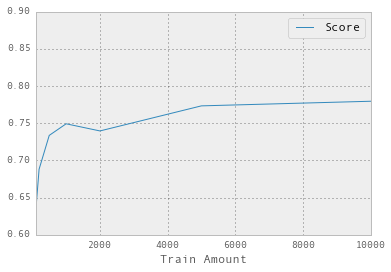

In [7]:
scores = pd.DataFrame(scoring)
scores.columns = ["Train Amount", "Score"]
scores.set_index('Train Amount', inplace=True)
scores.plot(ylim=(0.6,0.9))

# Problem 2

In [8]:
from sklearn.metrics import confusion_matrix

In [9]:
clf = LinearSVC()
X_train, X_validation, y_train, y_validation = train_test_split(
        X, y, test_size=10000, train_size=amnt, random_state=4100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_validation)

In [10]:
# from http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(range(0,10)))
    plt.xticks(tick_marks, range(0,10), rotation=45)
    plt.yticks(tick_marks, range(0,10))
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [11]:
confusion_matrix(y_pred, y_validation)

array([[ 877,    7,   20,   11,   10,   33,   21,   12,   20,   14],
       [   0, 1066,   31,    8,    8,    5,   10,   25,   34,    8],
       [  14,    8,  716,   31,   25,   14,   58,   32,   51,   18],
       [   5,   28,   57,  848,    6,   95,    7,   39,   42,   45],
       [   1,    6,   12,    4,  787,    9,   22,   14,   11,   95],
       [  58,   31,   48,   83,   91,  683,   79,   46,  371,  132],
       [   5,    4,   15,   14,   10,   16,  784,    3,    9,    1],
       [   3,    1,   19,   19,   15,    5,    1,  817,   14,   63],
       [   7,   13,   53,   19,    5,   13,    6,   10,  378,   22],
       [   0,    0,    2,    4,   50,    7,    2,   42,   14,  593]])

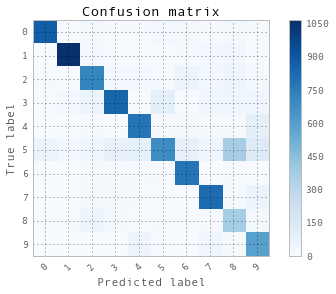

In [12]:
plot_confusion_matrix(confusion_matrix(y_pred, y_validation))

The confusion matrix gives us insight into where our algorithm is mis-classifying the data. More precisely, it allows us to see the classes that are most confused with one another. For example, classes `5` and `8` seem to be confused a fair amount by our algorithm. A focus in the next iteration might be to try and create features that might help differentiate these two classes further.

# Problem 3
Cross-validation is a technique that can help you avoid overfitting to your training set, or at least getting a sense of whether you are or not. The goal of any statistical/machine learning model is to generalize to previously unseen data and cross validation helps ensure that our current model isn't trained to overfit on the training and tests sets and will generalize to new data well.

Cross-validation also helps us tune hyperparameters (those that affect others) to achieve and reduce overfitting. Hyperparameters are those that affect others during training of a model and are a bit arbitrary - they aren't so much learned by empircally tested.

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, train_size=10000, random_state=4100)

def kfolds(X, y, n_folds):
    chunk_size = len(X)/n_folds
    chunks = [(chunk_size * x, chunk_size * (x+1)) for x in range(n_folds)]
    for start, end in chunks:
        sub_X = np.concatenate([X[:start], X[end:]])
        sub_y = np.concatenate([y[:start], y[end:]])
        other_X = X[start:end]
        other_y = y[start:end]
        yield sub_X, sub_y, other_X, other_y

In [35]:
results = {}
for C in [10/x for x in range(1, 30, 3)]:
    clf = LinearSVC(C=C)
    scores = []
    print("C Value: %.4f" % C)
    for count, (X_1, y_1, X_2, y_2) in enumerate(kfolds(X_train, y_train, 10)):
        clf.fit(X_1, y_1)
        score = clf.score(X_2, y_2)
        scores.append(score)
        print("    Fold Number: %i, Score: %.4f" % count, score)
    results[C] = scores
    for k, v in results.items():
        print(k, np.array(v).mean())

C Value: 10.0000
    Fold Number: 0
    Score: 0.7720
    Fold Number: 1
    Score: 0.8010
    Fold Number: 2
    Score: 0.7800
    Fold Number: 3
    Score: 0.7800
    Fold Number: 4
    Score: 0.7770
    Fold Number: 5
    Score: 0.7560
    Fold Number: 6
    Score: 0.7940
    Fold Number: 7
    Score: 0.7750
    Fold Number: 8
    Score: 0.7900
    Fold Number: 9
    Score: 0.7560
C Value: 2.5000
    Fold Number: 0
    Score: 0.7840
    Fold Number: 1
    Score: 0.7760
    Fold Number: 2
    Score: 0.7680
    Fold Number: 3
    Score: 0.7860
    Fold Number: 4
    Score: 0.7540
    Fold Number: 5
    Score: 0.7840
    Fold Number: 6
    Score: 0.7960
    Fold Number: 7
    Score: 0.7800
    Fold Number: 8
    Score: 0.7690
    Fold Number: 9
    Score: 0.7330
C Value: 1.4286
    Fold Number: 0
    Score: 0.7790
    Fold Number: 1
    Score: 0.7760
    Fold Number: 2
    Score: 0.7720
    Fold Number: 3
    Score: 0.7620
    Fold Number: 4
    Score: 0.7860
    Fold Number: 5
    Sco

In [39]:

for k, v in sorted(results.items()):
    print(k, np.array(v).mean(),np.array(v).var())

0.35714285714285715 0.7724 0.00051184
0.4 0.7695 0.00019305
0.45454545454545453 0.7695 0.00059245
0.5263157894736842 0.7783 0.00041941
0.625 0.782 0.0002038
0.7692307692307693 0.7806 0.00026264
1.0 0.7717 0.00026241
1.4285714285714286 0.7738 0.00016196
2.5 0.773 0.0003
10.0 0.7781 0.00019509


In [ ]:
# Submitting this to kaggle

# Problem 4

In [ ]:
train_spam = scipy.io.loadmat("data/")
test_spam = scipy.io.loadmat("data/digit-dataset/test.mat")